<a href="https://colab.research.google.com/github/gorzanskik-ai/intro-to-ann/blob/main/04_classification/01_classification_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klasyfikacja wieloklasowa na przykładzie Fashion MNIST

In [7]:
%tensorflow_version 2.x
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=12, suppress=True, linewidth=150)

In [8]:
(X_train, y_train), (X_test, y_test) = load_data()

In [9]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

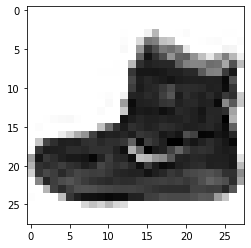

In [11]:
plt.imshow(X_train[0], cmap='gray_r')

In [12]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

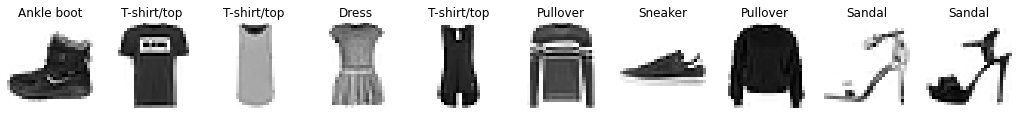

In [14]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i - 1], cmap='gray_r')
    plt.title(labels[y_train[i - 1]])
plt.show()

In [15]:
X_train = X_train / 255.
X_test = X_test / 255.

Budowa modelu

In [16]:
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 13s 3ms/step - loss: 0.4967 - accuracy: 0.8216 - val_loss: 0.4266 - val_accuracy: 0.8413
Epoch 2/10
4800/4800 [==============================] - 12s 3ms/step - loss: 0.3747 - accuracy: 0.8638 - val_loss: 0.3634 - val_accuracy: 0.8661
Epoch 3/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.3385 - accuracy: 0.8765 - val_loss: 0.3455 - val_accuracy: 0.8732
Epoch 4/10
4800/4800 [==============================] - 26s 5ms/step - loss: 0.3123 - accuracy: 0.8839 - val_loss: 0.3394 - val_accuracy: 0.8801
Epoch 5/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.2967 - accuracy: 0.8894 - val_loss: 0.3376 - val_accuracy: 0.8830
Epoch 6/10
4800/4800 [==============================] - 13s 3ms/step - loss: 0.2824 - accuracy: 0.8947 - val_loss: 0.3442 - val_accuracy: 0.8746
Epoch 7/10
4800/4800 [==============================] - 12s 3ms/step - loss: 0.2702 - accuracy: 0.8989 - val_loss: 0.3358 - val_ac

In [18]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.496712,0.821604,0.426570,0.841250,0
1,0.374705,0.863833,0.363365,0.866083,1
2,0.338511,0.876500,0.345486,0.873167,2
3,0.312272,0.883854,0.339396,0.880083,3
4,0.296683,0.889396,0.337602,0.883000,4


In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and loss')
fig.show()

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

In [27]:
test_acc

0.8801000118255615

In [30]:
predictions = model.predict(X_test)
predictions

array([[0.000000234827, 0.000000115388, 0.00000007167 , ..., 0.0025944782  , 0.000000019257, 0.9969554     ],
       [0.000007656145, 0.000000000006, 0.9984112     , ..., 0.            , 0.000000002171, 0.            ],
       [0.            , 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000000865534, 0.            , 0.000000005781, ..., 0.            , 0.99999464    , 0.            ],
       [0.000000000129, 0.9999944     , 0.            , ..., 0.            , 0.00000000152 , 0.            ],
       [0.000003024872, 0.000000000096, 0.000000549246, ..., 0.0001437496  , 0.000017797549, 0.000000098919]], dtype=float32)

In [31]:
predictions_df = pd.DataFrame(predictions)
predictions_df

,0,1,2,3,4,5,6,7,8,9
0,2.348274e-07,1.153882e-07,7.166996e-08,5.337831e-06,6.531589e-08,4.429142e-04,1.405178e-06,2.594478e-03,1.925710e-08,9.969554e-01
1,7.656145e-06,5.845728e-12,9.984112e-01,8.103778e-10,4.746106e-04,5.948005e-13,1.106513e-03,5.760673e-21,2.171274e-09,1.669895e-15
2,2.034379e-13,1.000000e+00,6.831911e-22,7.722514e-11,2.434453e-13,3.695254e-29,1.783582e-17,0.000000e+00,3.889149e-19,1.426663e-32
3,9.805892e-12,1.000000e+00,3.499887e-16,2.129132e-08,2.073524e-12,3.057648e-21,4.870384e-13,1.311183e-33,5.587002e-17,1.487540e-26
4,8.450042e-02,5.440765e-08,1.820563e-02,1.317172e-04,2.407389e-04,6.894775e-06,8.969088e-01,3.090453e-09,5.672115e-06,3.846750e-08
...,...,...,...,...,...,...,...,...,...,...
9995,1.904879e-17,1.307711e-16,1.391879e-26,1.190504e-22,1.591355e-25,1.995544e-06,4.727935e-22,3.107525e-06,1.434868e-19,9.999949e-01
9996,7.194232e-08,9.999980e-01,2.153404e-11,1.884474e-06,7.146102e-09,3.255742e-18,4.811644e-08,1.625968e-25,1.653562e-11,8.929704e-21
9997,8.655344e-07,3.159615e-15,5.780794e-09,1.793095e-10,3.873408e-06,4.426448e-10,6.183101e-07,9.074194e-16,9.999946e-01,1.045190e-17
9998,1.287759e-10,9.999944e-01,6.097781e-14,5.564063e-06,3.228005e-10,2.415775e-13,7.815726e-10,7.209111e-19,1.520040e-09,1.305388e-15


In [43]:
def get_labels(df):
    labels = []
    for i in range(df.shape[0]):
        index = df.loc[i].idxmax()
        labels.append(index)
    labels = np.array(labels)
    return labels

In [44]:
predictions_labels = get_labels(predictions_df)

In [48]:
test_predictions = pd.DataFrame({'test': y_test, 'predictions': predictions_labels})
test_predictions.head()

,test,predictions
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [54]:
missclassified = test_predictions.where(test_predictions['test'] != test_predictions['predictions']).dropna()
missclassified.head()

,test,predictions
12,7.0,5.0
17,4.0,2.0
23,9.0,5.0
25,4.0,2.0
40,6.0,0.0


In [60]:
missclassified.iloc[0]['test']

7.0

In [61]:
mc_index = missclassified.index.to_list()

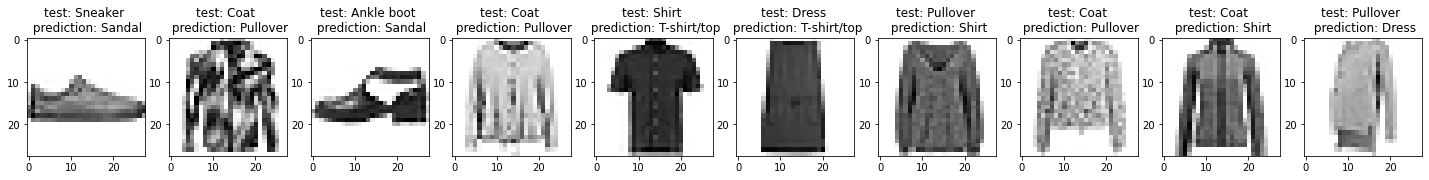

In [77]:
fig = plt.figure(figsize=(25, 36))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.imshow(X_test[mc_index[i - 1]], cmap='gray_r')
    test = int(missclassified.iloc[i - 1]['test'])
    prediction = int(missclassified.iloc[i - 1]['predictions'])
    plt.title(f'test: {labels[test]} \n prediction: {labels[prediction]}')
plt.show()

In [76]:
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']